In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as mno

# Deletion

In [3]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [35]:
groupby_attribute = "sex"
missing_attribute = "age"
missing_attribute_countcol = "{}_missing_countcol".format(missing_attribute)
df_missing_analysis = df.copy()
df_missing_analysis[missing_attribute_countcol] = df_missing_analysis[missing_attribute].isna()
df_m = df_missing_analysis.groupby(groupby_attribute).agg({missing_attribute_countcol : ["sum", "count"]})
df_m[missing_attribute_countcol]['sum'] / df_m[missing_attribute_countcol]['count']

sex
female    0.168790
male      0.214905
dtype: float64

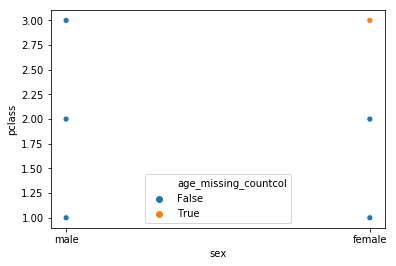

In [37]:
sns.scatterplot(data=df_missing_analysis, x='sex', y='pclass', hue=missing_attribute_countcol)

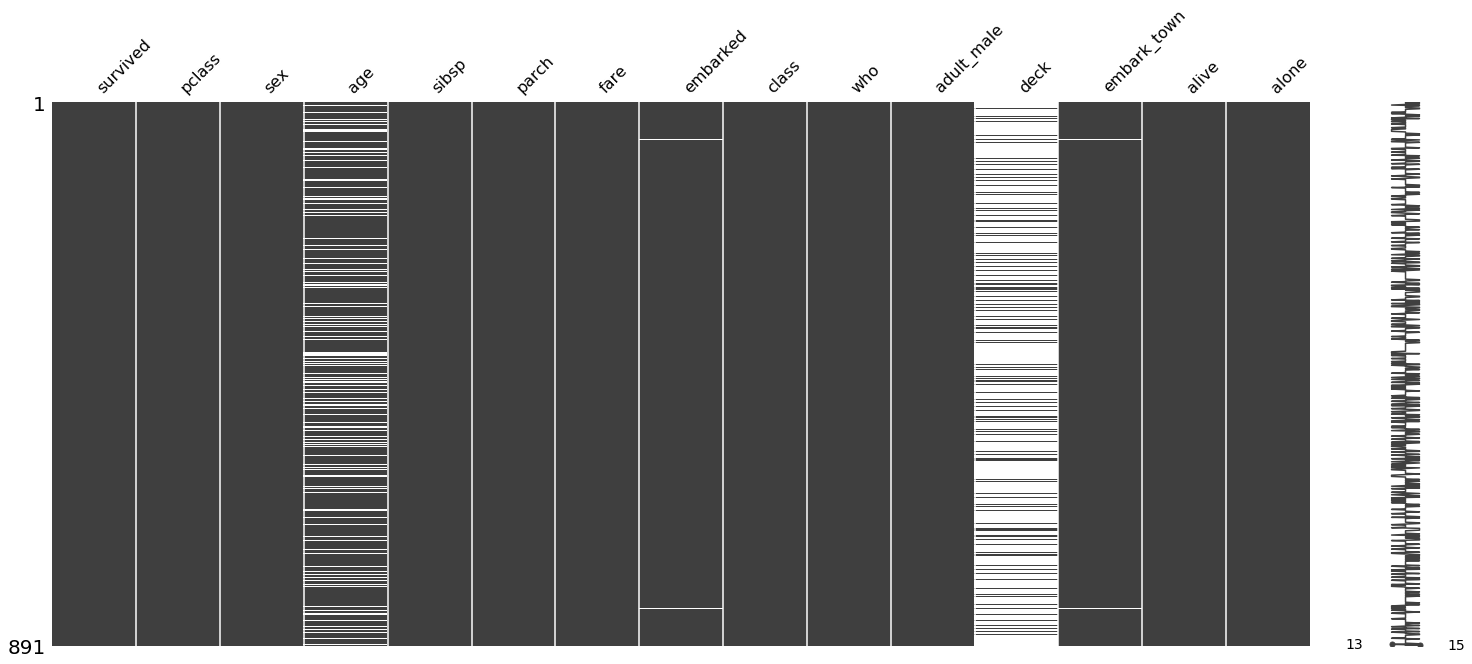

In [5]:
mno.matrix(df)

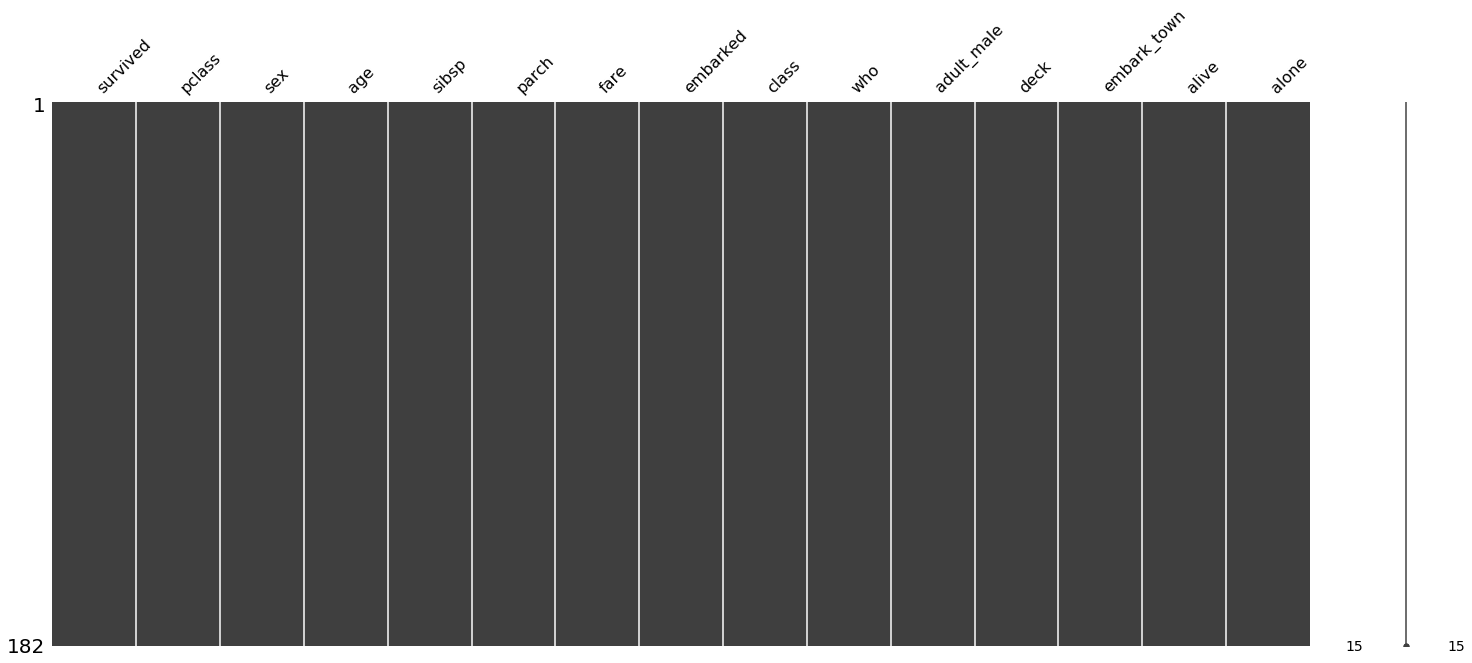

In [5]:
mno.matrix(df.dropna())

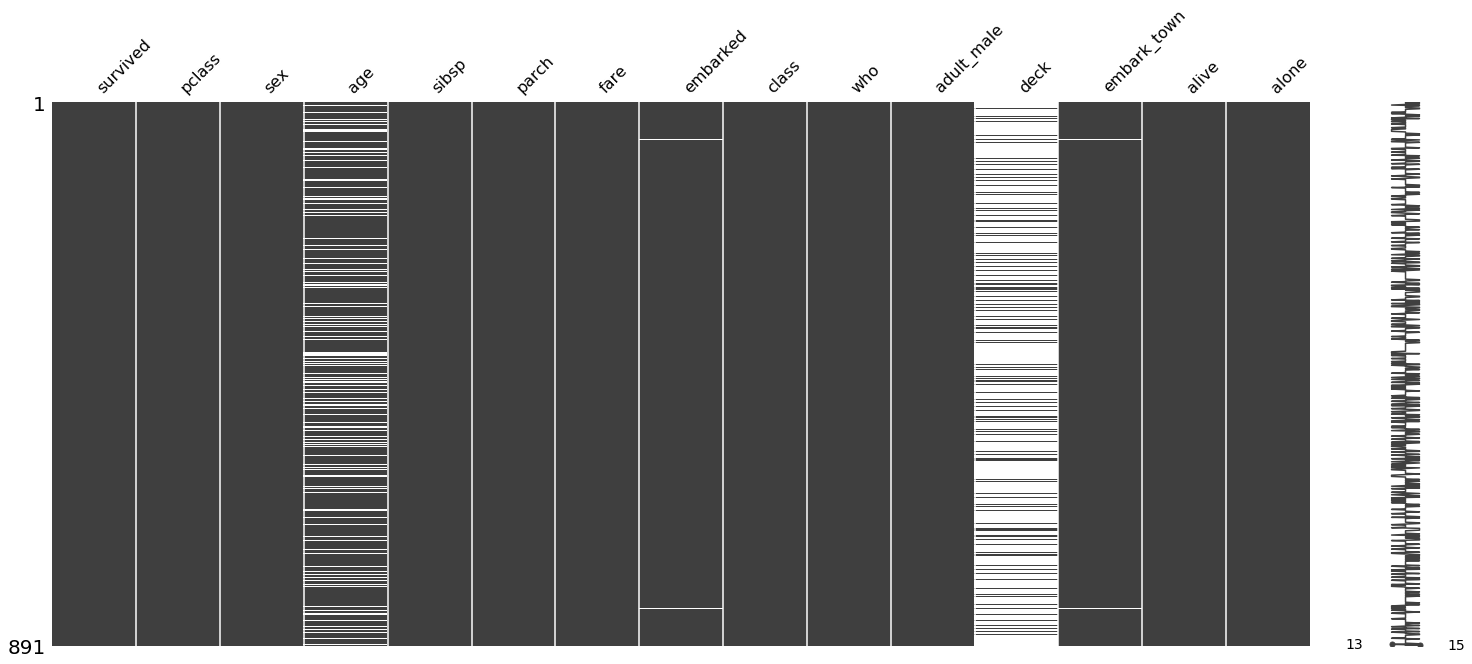

In [6]:
mno.matrix(df.dropna(how='all'))

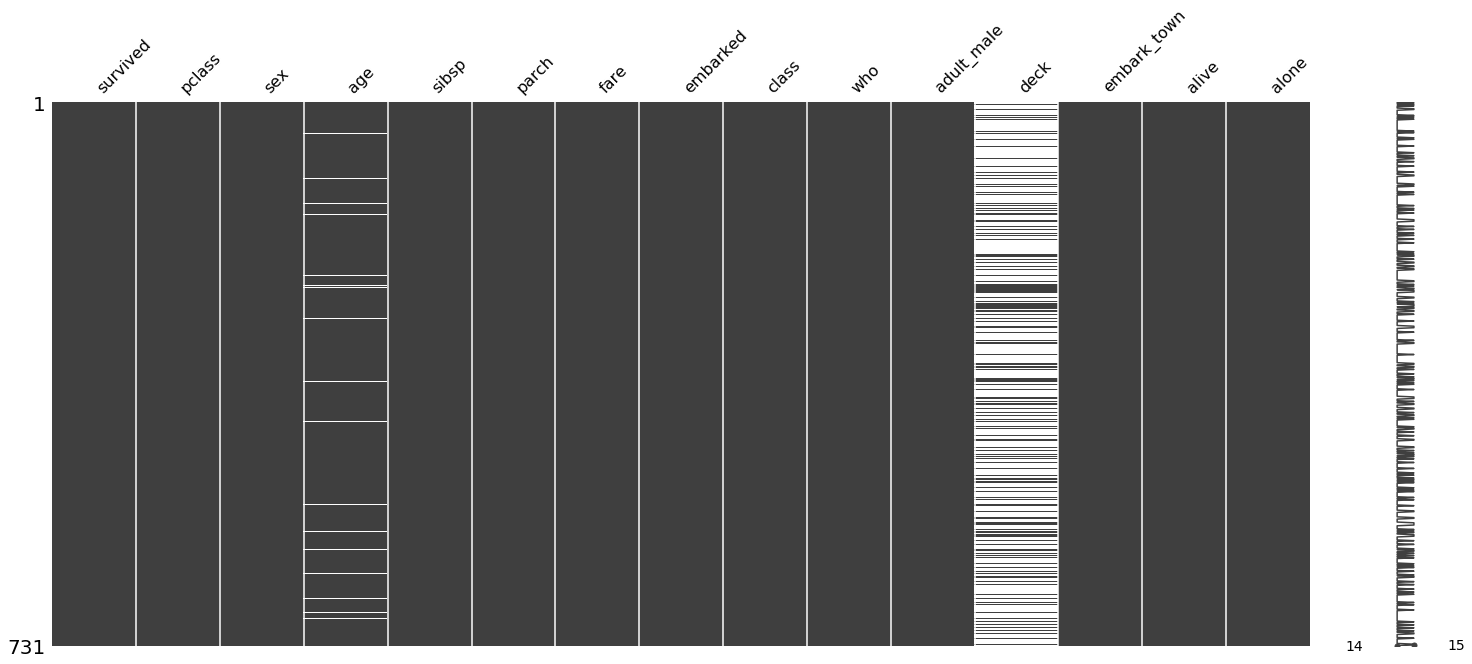

In [7]:
mno.matrix(df.dropna(thresh=14))

# Imputation

In [8]:
df_orders = pd.read_csv('merged_orders.csv',                 
                 infer_datetime_format=True,
                 parse_dates=['order_date_order'],
                 index_col=["order_id", "order_item_id"]
                 )
df_orders.head()

order_date_order  customer_id     order_status  \
order_id order_item_id                                                  
1        1                   2013-07-25        11599           CLOSED   
2        2                   2013-07-25          256  PENDING_PAYMENT   
         3                   2013-07-25          256  PENDING_PAYMENT   
         4                   2013-07-25          256  PENDING_PAYMENT   
4        5                   2013-07-25         8827           CLOSED   

                        product_id  quantity  subtotal  product_price  
order_id order_item_id                                                 
1        1                       1    299.98    299.98            957  
2        2                       1    199.99    199.99           1073  
         3                       5    250.00     50.00            502  
         4                       1    129.99    129.99            403  
4        5                       2     49.98     24.99            897

## Generate NA-Values

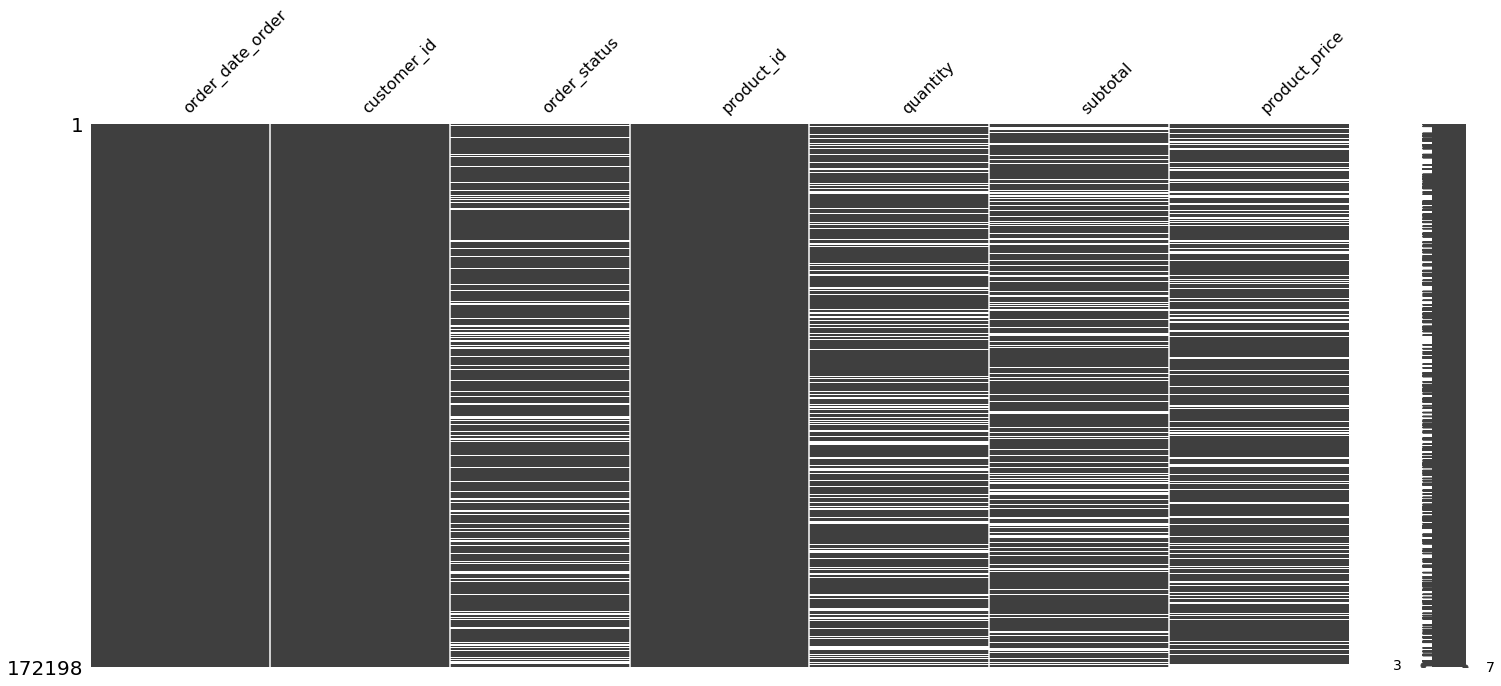

In [23]:
# remove some arbitrary order_status
import numpy as np

cols = ["order_status", "quantity", "product_price", "subtotal"]

remove_n = (int) (len(df_orders) * 0.2 )

df_orders_na = df_orders.copy()

for col in cols:
    random_rows = np.random.choice(df_orders.index, remove_n, replace=False)
    df_orders_na.loc[random_rows,col] = np.NaN
    
df_orders_na.to_csv('orders_merged_missing.csv')
mno.matrix(df_orders_na)

In [10]:
df_orders_na.head(10)

order_date_order  customer_id     order_status  \
order_id order_item_id                                                  
1        1                   2013-07-25        11599           CLOSED   
2        2                   2013-07-25          256  PENDING_PAYMENT   
         3                   2013-07-25          256              NaN   
         4                   2013-07-25          256  PENDING_PAYMENT   
4        5                   2013-07-25         8827           CLOSED   
         6                   2013-07-25         8827           CLOSED   
         7                   2013-07-25         8827              NaN   
         8                   2013-07-25         8827           CLOSED   
5        9                   2013-07-25        11318         COMPLETE   
         10                  2013-07-25        11318         COMPLETE   

                        product_id  quantity  subtotal  product_price  
order_id order_item_id                                                 
1        1                       1       NaN       NaN          957.0  
2        2                       1    199.99    199.99         1073.0  
         3                       5    250.00     50.00          502.0  
         4                       1    129.99       NaN          403.0  
4        5                       2       NaN     24.99          897.0  
         6                       5    299.95       NaN          365.0  
         7                       3    150.00     50.00          502.0  
         8                       4    199.92     49.98         1014.0  
5        9                       1    299.98    299.98            NaN  
         10                      5    299.95     59.99          365.0

## Hot-Deck Imputation (not recommended!)

In [11]:
df_orders_na.fillna(method='bfill',inplace=False).head(10)

order_date_order  customer_id     order_status  \
order_id order_item_id                                                  
1        1                   2013-07-25        11599           CLOSED   
2        2                   2013-07-25          256  PENDING_PAYMENT   
         3                   2013-07-25          256  PENDING_PAYMENT   
         4                   2013-07-25          256  PENDING_PAYMENT   
4        5                   2013-07-25         8827           CLOSED   
         6                   2013-07-25         8827           CLOSED   
         7                   2013-07-25         8827           CLOSED   
         8                   2013-07-25         8827           CLOSED   
5        9                   2013-07-25        11318         COMPLETE   
         10                  2013-07-25        11318         COMPLETE   

                        product_id  quantity  subtotal  product_price  
order_id order_item_id                                                 
1        1                       1    199.99    199.99          957.0  
2        2                       1    199.99    199.99         1073.0  
         3                       5    250.00     50.00          502.0  
         4                       1    129.99     24.99          403.0  
4        5                       2    299.95     24.99          897.0  
         6                       5    299.95     50.00          365.0  
         7                       3    150.00     50.00          502.0  
         8                       4    199.92     49.98         1014.0  
5        9                       1    299.98    299.98          365.0  
         10                      5    299.95     59.99          365.0

In [12]:
df_orders_na.fillna(method='ffill',inplace=False).head(10)

order_date_order  customer_id     order_status  \
order_id order_item_id                                                  
1        1                   2013-07-25        11599           CLOSED   
2        2                   2013-07-25          256  PENDING_PAYMENT   
         3                   2013-07-25          256  PENDING_PAYMENT   
         4                   2013-07-25          256  PENDING_PAYMENT   
4        5                   2013-07-25         8827           CLOSED   
         6                   2013-07-25         8827           CLOSED   
         7                   2013-07-25         8827           CLOSED   
         8                   2013-07-25         8827           CLOSED   
5        9                   2013-07-25        11318         COMPLETE   
         10                  2013-07-25        11318         COMPLETE   

                        product_id  quantity  subtotal  product_price  
order_id order_item_id                                                 
1        1                       1       NaN       NaN          957.0  
2        2                       1    199.99    199.99         1073.0  
         3                       5    250.00     50.00          502.0  
         4                       1    129.99     50.00          403.0  
4        5                       2    129.99     24.99          897.0  
         6                       5    299.95     24.99          365.0  
         7                       3    150.00     50.00          502.0  
         8                       4    199.92     49.98         1014.0  
5        9                       1    299.98    299.98         1014.0  
         10                      5    299.95     59.99          365.0

## Manual Imputation (simple mean)

In [16]:
df_orders_na.subtotal.fillna(df_orders_na.subtotal.mean(),inplace=True)
df_orders_na.quantity.fillna(df_orders_na.quantity.mean(),inplace=True)

In [17]:
df_orders_na.head(20)

order_date_order  customer_id     order_status  \
order_id order_item_id                                                  
1        1                   2013-07-25        11599           CLOSED   
2        2                   2013-07-25          256  PENDING_PAYMENT   
         3                   2013-07-25          256              NaN   
         4                   2013-07-25          256  PENDING_PAYMENT   
4        5                   2013-07-25         8827           CLOSED   
         6                   2013-07-25         8827           CLOSED   
         7                   2013-07-25         8827              NaN   
         8                   2013-07-25         8827           CLOSED   
5        9                   2013-07-25        11318         COMPLETE   
         10                  2013-07-25        11318         COMPLETE   
         11                  2013-07-25        11318         COMPLETE   
         12                  2013-07-25        11318         COMPLETE   
         13                  2013-07-25        11318         COMPLETE   
7        14                  2013-07-25         4530         COMPLETE   
         15                  2013-07-25         4530              NaN   
         16                  2013-07-25         4530         COMPLETE   
8        17                  2013-07-25         2911       PROCESSING   
         18                  2013-07-25         2911              NaN   
         19                  2013-07-25         2911       PROCESSING   
         20                  2013-07-25         2911       PROCESSING   

                        product_id    quantity    subtotal  product_price  
order_id order_item_id                                                     
1        1                       1  199.370215  133.868221          957.0  
2        2                       1  199.990000  199.990000         1073.0  
         3                       5  250.000000   50.000000          502.0  
         4                       1  129.990000  133.868221          403.0  
4        5                       2  199.370215   24.990000          897.0  
         6                       5  299.950000  133.868221          365.0  
         7                       3  150.000000   50.000000          502.0  
         8                       4  199.920000   49.980000         1014.0  
5        9                       1  299.980000  299.980000            NaN  
         10                      5  299.950000   59.990000          365.0  
         11                      2   99.960000   49.980000         1014.0  
         12                      1  299.980000  133.868221          957.0  
         13                      1  129.990000  129.990000          403.0  
7        14                      1  199.370215  199.990000            NaN  
         15                      1  299.980000  299.980000          957.0  
         16                      5   79.950000   15.990000          926.0  
8        17                      3  179.970000  133.868221          365.0  
         18                      5  299.950000   59.990000            NaN  
         19                      4  199.920000   49.980000         1014.0  
         20                      1   50.000000   50.000000          502.0

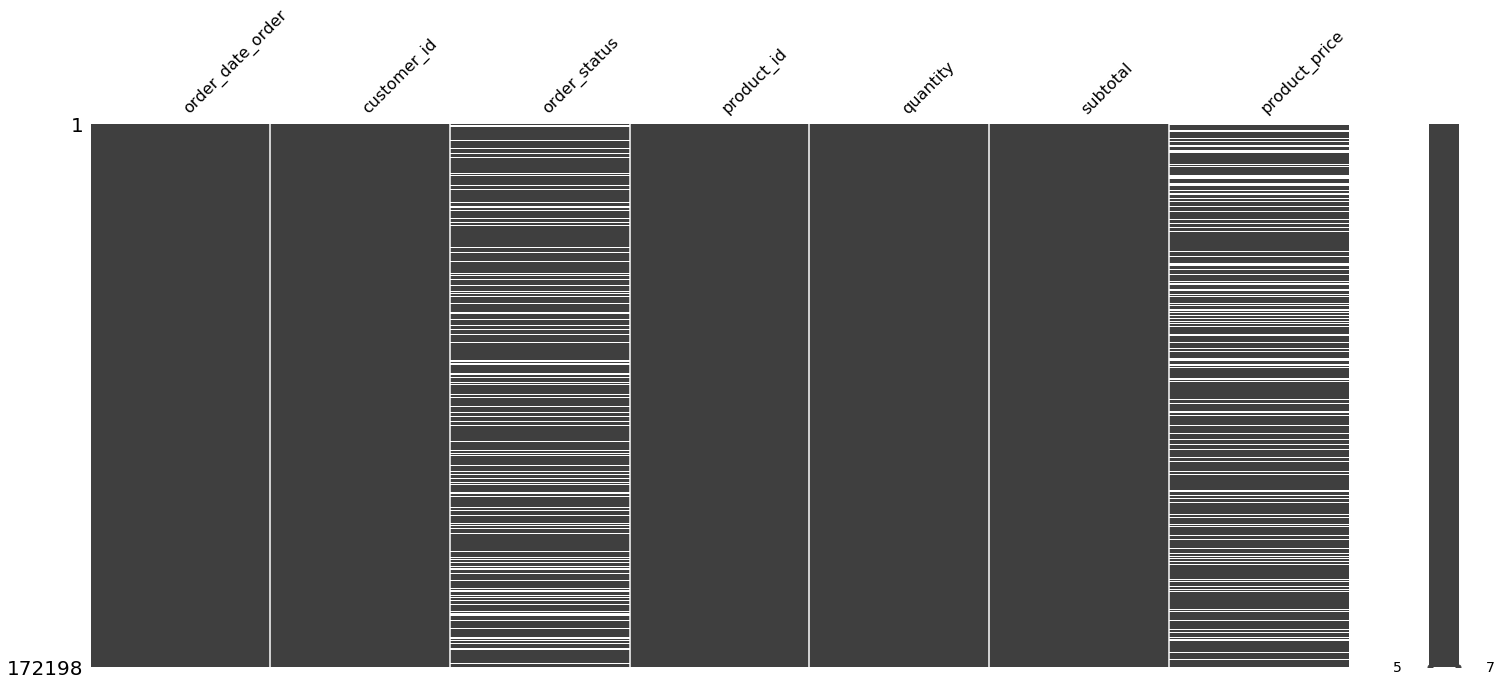

In [15]:
mno.matrix(df_orders_na)

## Manual Imputation (mean by product_id)

### The transform method

In [49]:
df_imputed_pd = df_orders_na.copy()

In [50]:
df_imputed_pd.groupby('product_id')['quantity'].mean()

product_id
1    204.112257
2    110.466828
3    166.854867
4    221.927814
5    276.992245
Name: quantity, dtype: float64

In [51]:
# the transform method allows to "bring back" the group-by values into the original dataframe
df_imputed_pd.groupby('product_id')['quantity'].transform("mean").head(20)

order_id  order_item_id
1         1                204.112257
2         2                204.112257
          3                276.992245
          4                204.112257
4         5                110.466828
          6                276.992245
          7                166.854867
          8                221.927814
5         9                204.112257
          10               276.992245
          11               110.466828
          12               204.112257
          13               204.112257
7         14               204.112257
          15               204.112257
          16               276.992245
8         17               166.854867
          18               276.992245
          19               221.927814
          20               204.112257
Name: quantity, dtype: float64

In [54]:
df_imputed_pd[df_imputed_pd['quantity'].isna()].head()

order_date_order  customer_id order_status  product_id  \
order_id order_item_id                                                          
1        1                   2013-07-25        11599       CLOSED           1   
2        2                   2013-07-25          256          NaN           1   
         4                   2013-07-25          256          NaN           1   
4        6                   2013-07-25         8827          NaN           5   
         8                   2013-07-25         8827       CLOSED           4   

                        quantity  subtotal  product_price  
order_id order_item_id                                     
1        1                   NaN    299.98          957.0  
2        2                   NaN    199.99         1073.0  
         4                   NaN       NaN          403.0  
4        6                   NaN     59.99          365.0  
         8                   NaN       NaN         1014.0

In [57]:
df_imputed_pd.loc[df_imputed_pd['quantity'].isna(), 'quantity'] = df_imputed_pd.groupby('product_id')['quantity'].transform("mean")
df_imputed_pd.head()

order_date_order  customer_id order_status  product_id  \
order_id order_item_id                                                          
1        1                   2013-07-25        11599       CLOSED           1   
2        2                   2013-07-25          256          NaN           1   
         3                   2013-07-25          256          NaN           5   
         4                   2013-07-25          256          NaN           1   
4        5                   2013-07-25         8827       CLOSED           2   

                          quantity  subtotal  product_price  
order_id order_item_id                                       
1        1              204.112257    299.98          957.0  
2        2              204.112257    199.99         1073.0  
         3              250.000000     50.00            NaN  
         4              204.112257       NaN          403.0  
4        5               49.980000     24.99          897.0

### This logic can be applied within "fillna"

In [47]:
df_imputed_pd['quantity'].fillna(df_imputed_pd.groupby('product_id')['quantity'].transform("mean"), 
                                 inplace=True)

df_imputed_pd.head(20)

order_date_order  customer_id order_status  product_id  \
order_id order_item_id                                                          
1        1                   2013-07-25        11599       CLOSED           1   
2        2                   2013-07-25          256          NaN           1   
         3                   2013-07-25          256          NaN           5   
         4                   2013-07-25          256          NaN           1   
4        5                   2013-07-25         8827       CLOSED           2   
         6                   2013-07-25         8827          NaN           5   
         7                   2013-07-25         8827          NaN           3   
         8                   2013-07-25         8827       CLOSED           4   
5        9                   2013-07-25        11318     COMPLETE           1   
         10                  2013-07-25        11318     COMPLETE           5   
         11                  2013-07-25        11318     COMPLETE           2   
         12                  2013-07-25        11318     COMPLETE           1   
         13                  2013-07-25        11318     COMPLETE           1   
7        14                  2013-07-25         4530     COMPLETE           1   
         15                  2013-07-25         4530          NaN           1   
         16                  2013-07-25         4530          NaN           5   
8        17                  2013-07-25         2911   PROCESSING           3   
         18                  2013-07-25         2911   PROCESSING           5   
         19                  2013-07-25         2911   PROCESSING           4   
         20                  2013-07-25         2911          NaN           1   

                          quantity  subtotal  product_price  
order_id order_item_id                                       
1        1              204.112257    299.98          957.0  
2        2              204.112257    199.99         1073.0  
         3              250.000000     50.00            NaN  
         4              204.112257       NaN          403.0  
4        5               49.980000     24.99          897.0  
         6              276.992245     59.99          365.0  
         7              150.000000     50.00            NaN  
         8              221.927814       NaN         1014.0  
5        9              299.980000    299.98          957.0  
         10             299.950000     59.99          365.0  
         11              99.960000     49.98         1014.0  
         12             204.112257    299.98          957.0  
         13             204.112257    129.99          403.0  
7        14             199.990000    199.99         1073.0  
         15             299.980000    299.98          957.0  
         16              79.950000     15.99          926.0  
8        17             179.970000     59.99            NaN  
         18             299.950000     59.99          365.0  
         19             199.920000     49.98         1014.0  
         20              50.000000     50.00          502.0

## Manual Imputation (mode for categorical columns)

In [18]:
df_imputed.order_status.fillna(df_imputed.order_status.mode()[0],inplace=True)
df_imputed.head()

order_date_order  customer_id     order_status  \
order_id order_item_id                                                  
1        1                   2013-07-25        11599           CLOSED   
2        2                   2013-07-25          256  PENDING_PAYMENT   
         4                   2013-07-25          256  PENDING_PAYMENT   
5        9                   2013-07-25        11318         COMPLETE   
         12                  2013-07-25        11318         COMPLETE   

                        product_id  quantity    subtotal  product_price  
order_id order_item_id                                                   
1        1                       1    299.98  133.823136     751.833489  
2        2                       1    199.99  199.990000    1073.000000  
         4                       1    129.99  129.990000     403.000000  
5        9                       1    299.98  299.980000     957.000000  
         12                      1    299.98  299.980000     957.000000

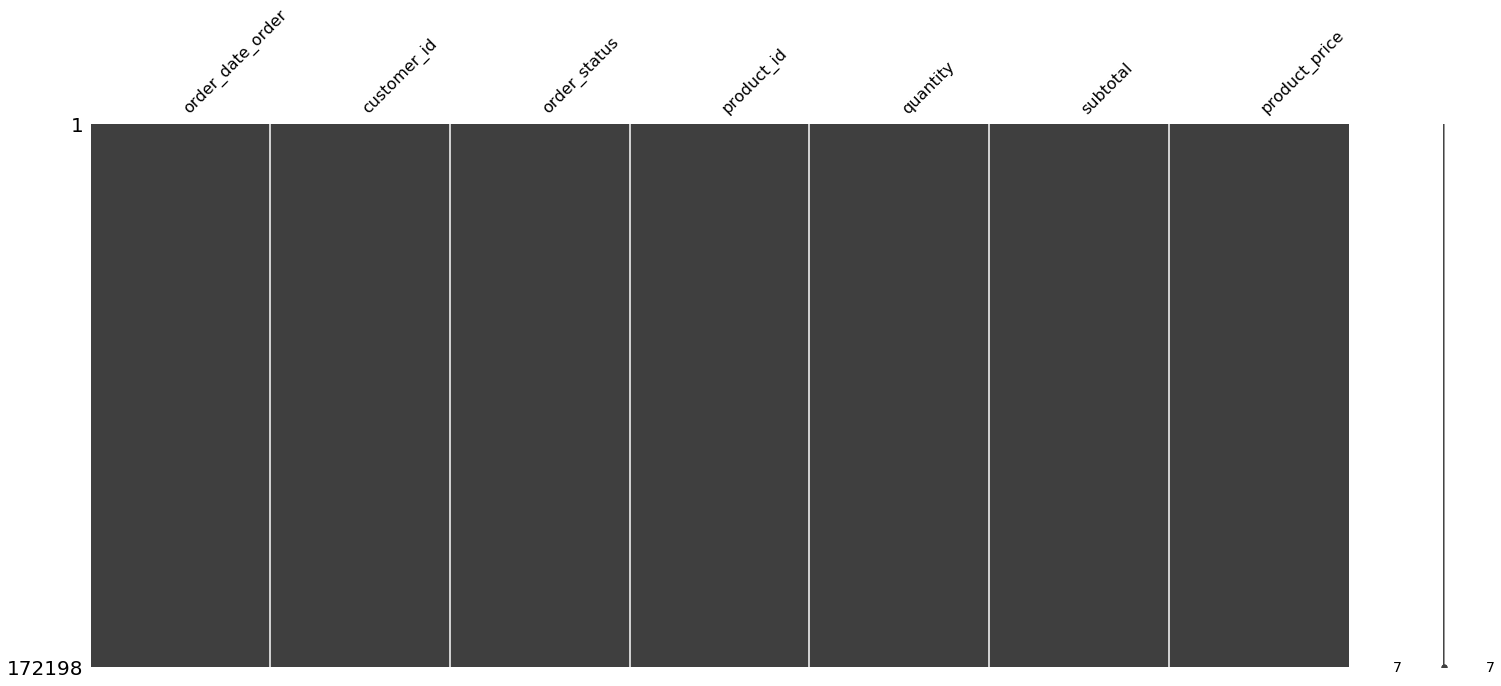

In [19]:
mno.matrix(df_imputed)

# Imputation by Scikit-Learn

## Mean

In [1]:
from sklearn.preprocessing import Imputer
df_skl_impute = df_orders_na.copy()
df_skl_impute.head(20)

NameError: name 'df_orders_na' is not defined

In [21]:
# after
imp_mean = Imputer()
df_skl_impute[['subtotal', 'quantity']] = imp_mean.fit_transform(df_skl_impute[['subtotal', 'quantity']])  # only numerical columns with default imputation
df_skl_impute.head(20)

order_date_order  customer_id     order_status  \
order_id order_item_id                                                  
1        1                   2013-07-25        11599           CLOSED   
2        2                   2013-07-25          256  PENDING_PAYMENT   
         3                   2013-07-25          256  PENDING_PAYMENT   
         4                   2013-07-25          256  PENDING_PAYMENT   
4        5                   2013-07-25         8827              NaN   
         6                   2013-07-25         8827           CLOSED   
         7                   2013-07-25         8827           CLOSED   
         8                   2013-07-25         8827           CLOSED   
5        9                   2013-07-25        11318         COMPLETE   
         10                  2013-07-25        11318         COMPLETE   
         11                  2013-07-25        11318         COMPLETE   
         12                  2013-07-25        11318         COMPLETE   
         13                  2013-07-25        11318              NaN   
7        14                  2013-07-25         4530         COMPLETE   
         15                  2013-07-25         4530         COMPLETE   
         16                  2013-07-25         4530         COMPLETE   
8        17                  2013-07-25         2911       PROCESSING   
         18                  2013-07-25         2911              NaN   
         19                  2013-07-25         2911       PROCESSING   
         20                  2013-07-25         2911       PROCESSING   

                        product_id    quantity    subtotal  product_price  
order_id order_item_id                                                     
1        1                       1  299.980000  133.823136            NaN  
2        2                       1  199.990000  199.990000         1073.0  
         3                       5  250.000000   50.000000          502.0  
         4                       1  129.990000  129.990000          403.0  
4        5                       2   49.980000   24.990000          897.0  
         6                       5  199.314966   59.990000            NaN  
         7                       3  150.000000   50.000000          502.0  
         8                       4  199.920000   49.980000         1014.0  
5        9                       1  299.980000  299.980000          957.0  
         10                      5  299.950000   59.990000          365.0  
         11                      2   99.960000   49.980000         1014.0  
         12                      1  299.980000  299.980000          957.0  
         13                      1  129.990000  129.990000          403.0  
7        14                      1  199.990000  199.990000         1073.0  
         15                      1  199.314966  299.980000          957.0  
         16                      5  199.314966   15.990000          926.0  
8        17                      3  179.970000   59.990000          365.0  
         18                      5  299.950000   59.990000          365.0  
         19                      4  199.920000   49.980000         1014.0  
         20                      1   50.000000   50.000000            NaN

## Median

In [22]:
df_skl_impute_median = df_orders_na.copy()
imp_mean = Imputer(strategy='median')
df_skl_impute_median[['subtotal', 'quantity']] = imp_mean.fit_transform(df_skl_impute_median[['subtotal', 'quantity']]) 
df_skl_impute_median.head(20)

order_date_order  customer_id     order_status  \
order_id order_item_id                                                  
1        1                   2013-07-25        11599           CLOSED   
2        2                   2013-07-25          256  PENDING_PAYMENT   
         3                   2013-07-25          256  PENDING_PAYMENT   
         4                   2013-07-25          256  PENDING_PAYMENT   
4        5                   2013-07-25         8827              NaN   
         6                   2013-07-25         8827           CLOSED   
         7                   2013-07-25         8827           CLOSED   
         8                   2013-07-25         8827           CLOSED   
5        9                   2013-07-25        11318         COMPLETE   
         10                  2013-07-25        11318         COMPLETE   
         11                  2013-07-25        11318         COMPLETE   
         12                  2013-07-25        11318         COMPLETE   
         13                  2013-07-25        11318              NaN   
7        14                  2013-07-25         4530         COMPLETE   
         15                  2013-07-25         4530         COMPLETE   
         16                  2013-07-25         4530         COMPLETE   
8        17                  2013-07-25         2911       PROCESSING   
         18                  2013-07-25         2911              NaN   
         19                  2013-07-25         2911       PROCESSING   
         20                  2013-07-25         2911       PROCESSING   

                        product_id    quantity    subtotal  product_price  
order_id order_item_id                                                     
1        1                       1  299.980000  133.823136            NaN  
2        2                       1  199.990000  199.990000         1073.0  
         3                       5  250.000000   50.000000          502.0  
         4                       1  129.990000  129.990000          403.0  
4        5                       2   49.980000   24.990000          897.0  
         6                       5  199.314966   59.990000            NaN  
         7                       3  150.000000   50.000000          502.0  
         8                       4  199.920000   49.980000         1014.0  
5        9                       1  299.980000  299.980000          957.0  
         10                      5  299.950000   59.990000          365.0  
         11                      2   99.960000   49.980000         1014.0  
         12                      1  299.980000  299.980000          957.0  
         13                      1  129.990000  129.990000          403.0  
7        14                      1  199.990000  199.990000         1073.0  
         15                      1  199.314966  299.980000          957.0  
         16                      5  199.314966   15.990000          926.0  
8        17                      3  179.970000   59.990000          365.0  
         18                      5  299.950000   59.990000          365.0  
         19                      4  199.920000   49.980000         1014.0  
         20                      1   50.000000   50.000000            NaN

In [23]:
# we will learn how to use the preprocessing package later on (including mode-imputation)

# package fancyimpute

In [24]:
# you probably need to install it first

# try this:
#import sys
#!{sys.executable} -m easy_install fancyimpute

# afterwards restart the jupyter notebook kernel

# alternatively try this + restart:
#!{sys.executable} -m pip install fancyimpute

In [31]:
from fancyimpute import SimpleFill

df_fi = df_orders_na.copy()
sf = SimpleFill()
df_fi[['quantity', 'subtotal']] = sf.fit_transform(df_fi[['quantity', 'subtotal']])
df_fi.head(20)

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\fancyimpute-0.4.0-py3.6.egg\fancyimpute\solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


order_date_order  customer_id     order_status  \
order_id order_item_id                                                  
1        1                   2013-07-25        11599           CLOSED   
2        2                   2013-07-25          256  PENDING_PAYMENT   
         3                   2013-07-25          256  PENDING_PAYMENT   
         4                   2013-07-25          256  PENDING_PAYMENT   
4        5                   2013-07-25         8827              NaN   
         6                   2013-07-25         8827           CLOSED   
         7                   2013-07-25         8827           CLOSED   
         8                   2013-07-25         8827           CLOSED   
5        9                   2013-07-25        11318         COMPLETE   
         10                  2013-07-25        11318         COMPLETE   
         11                  2013-07-25        11318         COMPLETE   
         12                  2013-07-25        11318         COMPLETE   
         13                  2013-07-25        11318              NaN   
7        14                  2013-07-25         4530         COMPLETE   
         15                  2013-07-25         4530         COMPLETE   
         16                  2013-07-25         4530         COMPLETE   
8        17                  2013-07-25         2911       PROCESSING   
         18                  2013-07-25         2911              NaN   
         19                  2013-07-25         2911       PROCESSING   
         20                  2013-07-25         2911       PROCESSING   

                        product_id    quantity    subtotal  product_price  
order_id order_item_id                                                     
1        1                       1  299.980000  133.823136            NaN  
2        2                       1  199.990000  199.990000         1073.0  
         3                       5  250.000000   50.000000          502.0  
         4                       1  129.990000  129.990000          403.0  
4        5                       2   49.980000   24.990000          897.0  
         6                       5  199.314966   59.990000            NaN  
         7                       3  150.000000   50.000000          502.0  
         8                       4  199.920000   49.980000         1014.0  
5        9                       1  299.980000  299.980000          957.0  
         10                      5  299.950000   59.990000          365.0  
         11                      2   99.960000   49.980000         1014.0  
         12                      1  299.980000  299.980000          957.0  
         13                      1  129.990000  129.990000          403.0  
7        14                      1  199.990000  199.990000         1073.0  
         15                      1  199.314966  299.980000          957.0  
         16                      5  199.314966   15.990000          926.0  
8        17                      3  179.970000   59.990000          365.0  
         18                      5  299.950000   59.990000          365.0  
         19                      4  199.920000   49.980000         1014.0  
         20                      1   50.000000   50.000000            NaN